<a href="https://colab.research.google.com/github/SarvagyaSaxena101/Deep-Learning-Models/blob/main/Brain_Tumor_3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("prathamgrover/3d-liver-segmentation")

print("Path to dataset files:", path)

  0%|          | 0.00/2.16G [00:00<?, ?B/s]

100%|██████████| 2.16G/2.16G [00:16<00:00, 138MB/s]

Extracting files...


100%|██████████| 2.16G/2.16G [00:16<00:00, 138MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/prathamgrover/3d-liver-segmentation/versions/1
Path to dataset files: /root/.cache/kagglehub/datasets/prathamgrover/3d-liver-segmentation/versions/1


In [2]:
!cd /root/.cache/kagglehub/datasets/prathamgrover/3d-liver-segmentation/versions/1

In [3]:
!ls

sample_data


In [4]:
!pip install nibabel matplotlib scikit-learn tensorflow keras

In [5]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers



image_files = sorted([os.path.join(images_path, f) for f in os.listdir(images_path)])
label_files = sorted([os.path.join(labels_path, f) for f in os.listdir(labels_path)])

print(f"Found {len(image_files)} images and {len(label_files)} masks")

Found 123 images and 123 masks


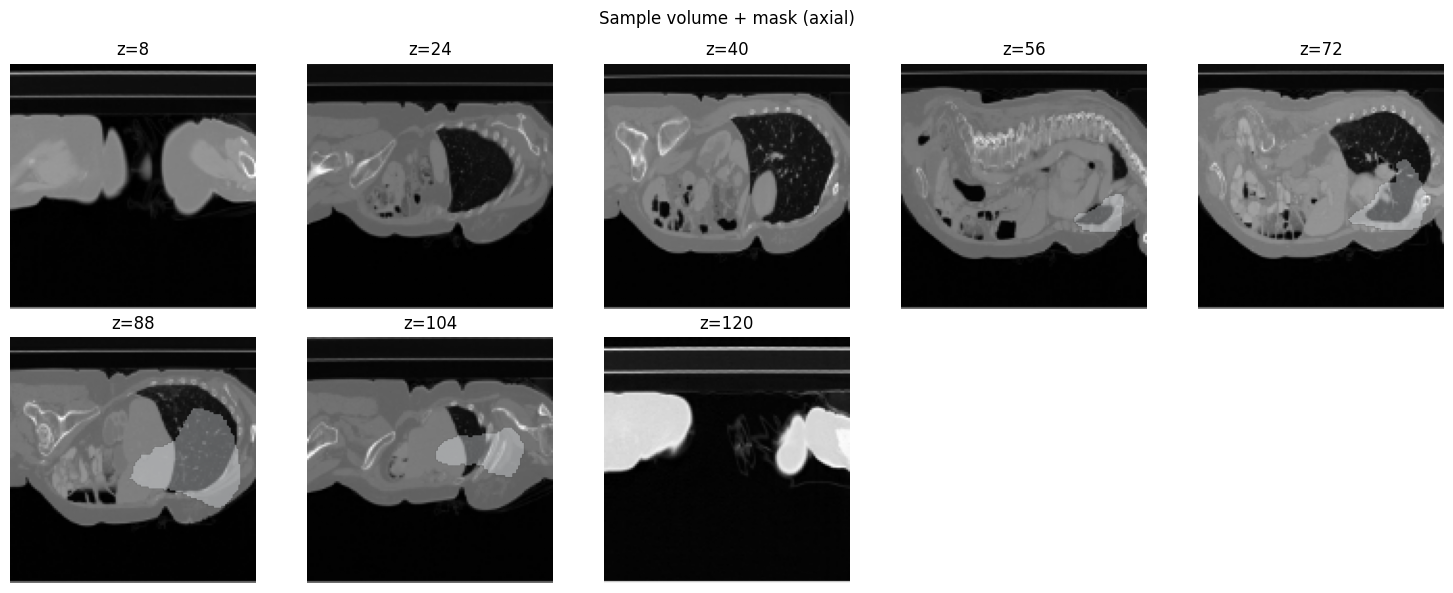

Model: "UNet3D"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 128, 128,  │          0 │ -                 │
│ (InputLayer)        │ 128, 1)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d (Conv3D)     │ (None, 128, 128,  │        864 │ input_layer[0][0] │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 128, 128,  │        128 │ conv3d[0][0]      │
│ (BatchNormalizatio… │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu (ReLU)        │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_1 (Conv3D)   │ (None, 128, 128,  │     27,648 │ re_lu[0][0]       │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv3d_1[0][0]    │
│ (BatchNormalizatio… │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_1 (ReLU)      │ (None, 128, 128,  │          0 │ batch_normalizat… │
│                     │ 128, 32)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d       │ (None, 64, 64,    │          0 │ re_lu_1[0][0]     │
│ (MaxPooling3D)      │ 64, 32)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_2 (Conv3D)   │ (None, 64, 64,    │     55,296 │ max_pooling3d[0]… │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv3d_2[0][0]    │
│ (BatchNormalizatio… │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_2 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_3 (Conv3D)   │ (None, 64, 64,    │    110,592 │ re_lu_2[0][0]     │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 64, 64,    │        256 │ conv3d_3[0][0]    │
│ (BatchNormalizatio… │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_3 (ReLU)      │ (None, 64, 64,    │          0 │ batch_normalizat… │
│                     │ 64, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling3d_1     │ (None, 32, 32,    │          0 │ re_lu_3[0][0]     │
│ (MaxPooling3D)      │ 32, 64)           │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv3d_4 (Conv3D)   │ (None, 32, 32,    │    221,184 │ max_pooling3d_1[… │
│                     │ 32, 128)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 32, 32,    │        512 │ conv3d_4[0][0]  

 Total params: 22,584,194 (86.15 MB)

 Trainable params: 22,578,306 (86.13 MB)

 Non-trainable params: 5,888 (23.00 KB)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7524 - dice_coef: 0.4189 - loss: 0.5640
Epoch 1: val_loss improved from inf to 1.52004, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 237s 2s/step - accuracy: 0.7538 - dice_coef: 0.4194 - loss: 0.5629 - val_accuracy: 0.4558 - val_dice_coef: 0.3073 - val_loss: 1.5200 - learning_rate: 1.0000e-04
Epoch 2/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9833 - dice_coef: 0.5546 - loss: 0.3184
Epoch 2: val_loss improved from 1.52004 to 0.47063, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.9833 - dice_coef: 0.5548 - loss: 0.3182 - val_accuracy: 0.9292 - val_dice_coef: 0.4895 - val_loss: 0.4706 - learning_rate: 1.0000e-04
Epoch 3/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9857 - dice_coef: 0.6211 - loss: 0.2541
Epoch 3: val_loss improved from 0.47063 to 0.42259, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9857 - dice_coef: 0.6211 - loss: 0.2541 - val_accuracy: 0.9125 - val_dice_coef: 0.5378 - val_loss: 0.4226 - learning_rate: 1.0000e-04
Epoch 4/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9887 - dice_coef: 0.6454 - loss: 0.2283
Epoch 4: val_loss improved from 0.42259 to 0.30409, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9887 - dice_coef: 0.6454 - loss: 0.2282 - val_accuracy: 0.9706 - val_dice_coef: 0.5444 - val_loss: 0.3041 - learning_rate: 1.0000e-04
Epoch 5/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9908 - dice_coef: 0.6634 - loss: 0.2106
Epoch 5: val_loss improved from 0.30409 to 0.24226, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9908 - dice_coef: 0.6635 - loss: 0.2105 - val_accuracy: 0.9765 - val_dice_coef: 0.6336 - val_loss: 0.2423 - learning_rate: 1.0000e-04
Epoch 6/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9920 - dice_coef: 0.6994 - loss: 0.1856
Epoch 6: val_loss did not improve from 0.24226
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9920 - dice_coef: 0.6994 - loss: 0.1855 - val_accuracy: 0.9656 - val_dice_coef: 0.5040 - val_loss: 0.3197 - learning_rate: 1.0000e-04
Epoch 7/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9928 - dice_coef: 0.7164 - loss: 0.1710
Epoch 7: val_loss did not improve from 0.24226
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9928 - dice_coef: 0.7165 - loss: 0.1710 - val_accuracy: 0.9656 - val_dice_coef: 0.5021 - val_loss: 0.3204 - learning_rate: 1.0000e-04
Epoch 8/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9916 - dice_coef: 0.7404 - loss: 0.1573
Epoch 8: val_loss improved from 0

98/98 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.9916 - dice_coef: 0.7405 - loss: 0.1572 - val_accuracy: 0.9826 - val_dice_coef: 0.7101 - val_loss: 0.1843 - learning_rate: 1.0000e-04
Epoch 9/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9942 - dice_coef: 0.7693 - loss: 0.1364
Epoch 9: val_loss improved from 0.18434 to 0.16848, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 205s 2s/step - accuracy: 0.9942 - dice_coef: 0.7694 - loss: 0.1364 - val_accuracy: 0.9832 - val_dice_coef: 0.7412 - val_loss: 0.1685 - learning_rate: 1.0000e-04
Epoch 10/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9943 - dice_coef: 0.7893 - loss: 0.1240
Epoch 10: val_loss did not improve from 0.16848
98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9943 - dice_coef: 0.7894 - loss: 0.1240 - val_accuracy: 0.9656 - val_dice_coef: 0.4983 - val_loss: 0.3281 - learning_rate: 1.0000e-04
Epoch 11/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9937 - dice_coef: 0.8014 - loss: 0.1177
Epoch 11: val_loss improved from 0.16848 to 0.15402, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 209s 2s/step - accuracy: 0.9937 - dice_coef: 0.8015 - loss: 0.1176 - val_accuracy: 0.9828 - val_dice_coef: 0.7639 - val_loss: 0.1540 - learning_rate: 1.0000e-04
Epoch 12/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9950 - dice_coef: 0.8244 - loss: 0.1024
Epoch 12: val_loss improved from 0.15402 to 0.13277, saving model to unet3d_best.h5


98/98 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.9950 - dice_coef: 0.8245 - loss: 0.1024 - val_accuracy: 0.9843 - val_dice_coef: 0.7966 - val_loss: 0.1328 - learning_rate: 1.0000e-04
Epoch 13/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9951 - dice_coef: 0.8510 - loss: 0.0877
Epoch 13: val_loss did not improve from 0.13277
98/98 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9951 - dice_coef: 0.8510 - loss: 0.0877 - val_accuracy: 0.9799 - val_dice_coef: 0.7160 - val_loss: 0.1846 - learning_rate: 1.0000e-04
Epoch 14/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9950 - dice_coef: 0.8676 - loss: 0.0786
Epoch 14: val_loss did not improve from 0.13277
98/98 ━━━━━━━━━━━━━━━━━━━━ 140s 1s/step - accuracy: 0.9950 - dice_coef: 0.8675 - loss: 0.0786 - val_accuracy: 0.9700 - val_dice_coef: 0.7036 - val_loss: 0.2073 - learning_rate: 1.0000e-04
Epoch 15/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9957 - dice_coef: 0.8678 - loss: 0.0768
Epoch 15: val_loss improved 

98/98 ━━━━━━━━━━━━━━━━━━━━ 150s 2s/step - accuracy: 0.9957 - dice_coef: 0.8679 - loss: 0.0768 - val_accuracy: 0.9845 - val_dice_coef: 0.8125 - val_loss: 0.1261 - learning_rate: 1.0000e-04
Epoch 16/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9957 - dice_coef: 0.8861 - loss: 0.0669
Epoch 16: val_loss did not improve from 0.12610
98/98 ━━━━━━━━━━━━━━━━━━━━ 196s 1s/step - accuracy: 0.9957 - dice_coef: 0.8861 - loss: 0.0669 - val_accuracy: 0.9768 - val_dice_coef: 0.6733 - val_loss: 0.2125 - learning_rate: 1.0000e-04
Epoch 17/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9940 - dice_coef: 0.8810 - loss: 0.0723
Epoch 17: val_loss did not improve from 0.12610
98/98 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9940 - dice_coef: 0.8809 - loss: 0.0723 - val_accuracy: 0.9737 - val_dice_coef: 0.7606 - val_loss: 0.1760 - learning_rate: 1.0000e-04
Epoch 18/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9930 - dice_coef: 0.8663 - loss: 0.0810
Epoch 18: val_loss did not i

98/98 ━━━━━━━━━━━━━━━━━━━━ 148s 2s/step - accuracy: 0.9963 - dice_coef: 0.9154 - loss: 0.0500 - val_accuracy: 0.9860 - val_dice_coef: 0.8467 - val_loss: 0.1070 - learning_rate: 3.0000e-05
Epoch 22/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9962 - dice_coef: 0.9222 - loss: 0.0465
Epoch 22: val_loss did not improve from 0.10703
98/98 ━━━━━━━━━━━━━━━━━━━━ 195s 1s/step - accuracy: 0.9962 - dice_coef: 0.9222 - loss: 0.0465 - val_accuracy: 0.9828 - val_dice_coef: 0.8068 - val_loss: 0.1334 - learning_rate: 3.0000e-05
Epoch 23/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9963 - dice_coef: 0.9210 - loss: 0.0469
Epoch 23: val_loss did not improve from 0.10703
98/98 ━━━━━━━━━━━━━━━━━━━━ 143s 1s/step - accuracy: 0.9963 - dice_coef: 0.9210 - loss: 0.0470 - val_accuracy: 0.9855 - val_dice_coef: 0.8442 - val_loss: 0.1102 - learning_rate: 3.0000e-05
Epoch 24/60
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9960 - dice_coef: 0.9224 - loss: 0.0467
Epoch 24: val_loss did not i

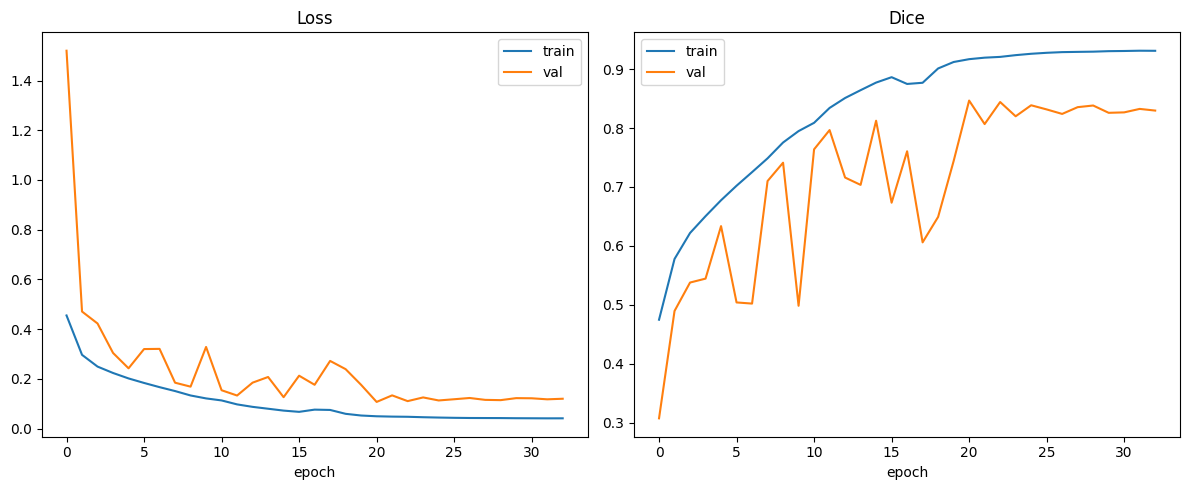

Validation metrics (voxel-wise):
        acc: 0.9860
  precision: 0.8344
     recall: 0.7499
         f1: 0.7599
       dice: 0.7599
        iou: 0.6776


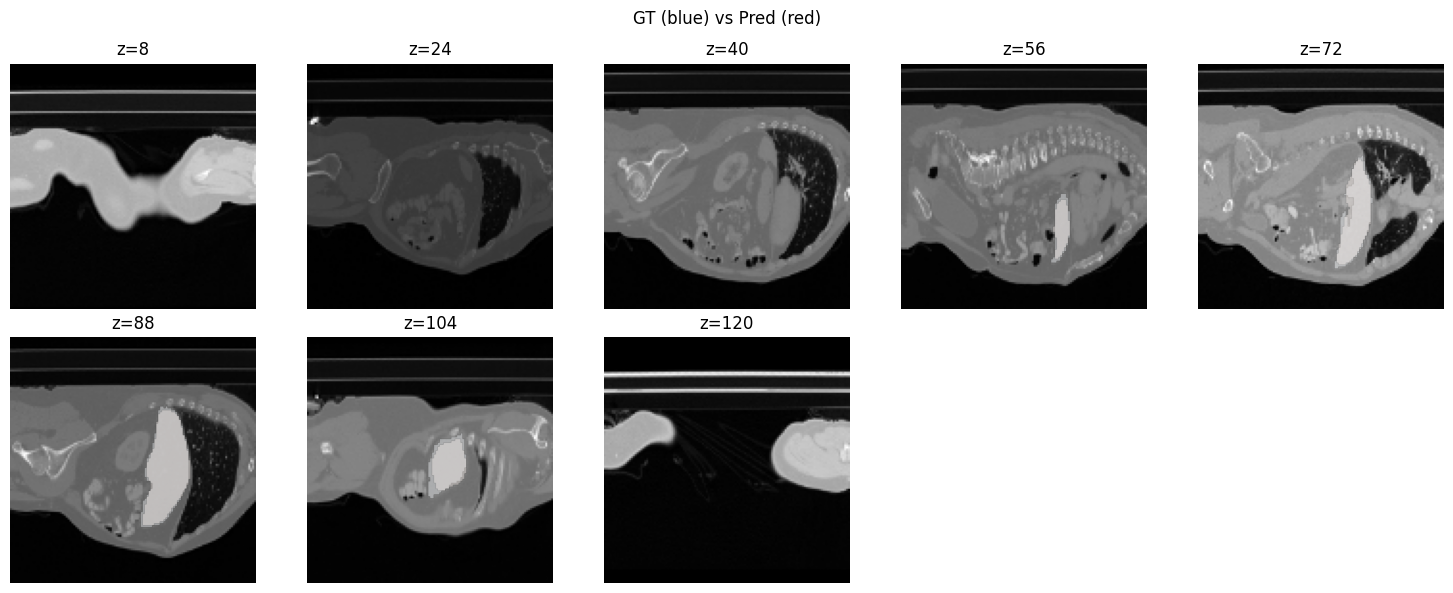

Saved: val_pred_mask_resampled.nii.gz


In [8]:
# ===============================
# 3D Liver Segmentation in Keras
# ===============================

!pip -q install nibabel plotly

import os, glob, random, math
import numpy as np
import nibabel as nib
import plotly.graph_objects as go
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from scipy.ndimage import zoom, rotate
import matplotlib.pyplot as plt

# -------------------------
# Config
# -------------------------
IMG_SIZE    = (128, 128, 128)     # (Z, Y, X)
NUM_CLASSES = 2                   # 0=background, 1=liver
BATCH_SIZE  = 1                   # keep small for 3D
EPOCHS      = 60
LR          = 1e-4
AUGMENT     = True                # flip/rotate on-the-fly
SEED        = 42
np.random.seed(SEED)
tf.random.set_seed(SEED)

# ===== Paths (EDIT ME) =====
# Paths
data_path = "/root/.cache/kagglehub/datasets/prathamgrover/3d-liver-segmentation/versions/1/Task03_Liver_rs"
IMAGES_DIR = os.path.join(data_path, "imagesTr")
LABELS_DIR = os.path.join(data_path, "labelsTr")

# ---------------------------------
# Utility: IO + resizing + padding
# ---------------------------------
def load_nifti(path):
    img = nib.load(path)
    data = img.get_fdata(dtype=np.float32)
    return data, img.affine

def pad_or_crop(vol, target_shape):
    zt, yt, xt = target_shape
    z, y, x = vol.shape
    # pad
    pz = max(0, zt - z); py = max(0, yt - y); px = max(0, xt - x)
    if pz or py or px:
        vol = np.pad(
            vol,
            ((pz//2, pz - pz//2),
             (py//2, py - py//2),
             (px//2, px - px//2)),
            mode="constant", constant_values=0
        )
    # crop
    z, y, x = vol.shape
    sz = max(0, (z - zt)//2); sy = max(0, (y - yt)//2); sx = max(0, (x - xt)//2)
    vol = vol[sz:sz+zt, sy:sy+yt, sx:sx+xt]
    return vol

def resize_3d(vol, target_shape, order):
    """Resize 3D with scipy.ndimage.zoom (order=1 linear for images, 0 nearest for labels)."""
    z, y, x = vol.shape
    zt, yt, xt = target_shape
    factors = (zt / max(z, 1), yt / max(y, 1), xt / max(x, 1))
    return zoom(vol, factors, order=order)

def normalize_zscore(vol, eps=1e-8):
    m, s = vol.mean(), vol.std()
    return (vol - m) / (s + eps) if s > 0 else vol * 0.0

# ---------------------------------
# Visualization helpers
# ---------------------------------
def show_slices_grid(img, mask=None, pred=None, title="Slices (Z-axis)", step=16):
    """Plots a grid of axial slices. img: (Z,Y,X), mask/pred: (Z,Y,X) binary."""
    slices = list(range(step//2, img.shape[0], step))
    cols = 5
    rows = math.ceil(len(slices) / cols)
    plt.figure(figsize=(3*cols, 3*rows))
    for i, s in enumerate(slices):
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(img[s, :, :], cmap="gray")
        if mask is not None:
            ax.imshow(np.ma.masked_where(mask[s]==0, mask[s]), cmap="Blues", alpha=0.35)
        if pred is not None:
            ax.imshow(np.ma.masked_where(pred[s]==0, pred[s]), cmap="Reds",  alpha=0.35)
        ax.set_title(f"z={s}")
        ax.axis("off")
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

def show_3d_volume_mask(mask, title="Mask isosurface (plotly)", level=0.5):
    """Quick 3D isosurface of mask. mask shape: (Z,Y,X) float/bool."""
    m = mask.astype(np.float32)
    fig = go.Figure(data=go.Isosurface(
        value=m,
        isomin=level,
        isomax=1.0,
        caps=dict(x_show=False, y_show=False, z_show=False),
        opacity=0.5
    ))
    fig.update_layout(title=title, width=800, height=600)
    fig.show()

# ---------------------------------
# Dataset (Sequence) with augment
# ---------------------------------
class Nifti3DSeg(keras.utils.Sequence):
    def __init__(self, image_files, label_files, batch_size=1,
                 target_shape=(128,128,128), shuffle=True, augment=False):
        assert len(image_files) == len(label_files)
        self.imgs = image_files
        self.lbls = label_files
        self.bs = batch_size
        self.target = target_shape
        self.shuffle = shuffle
        self.augment = augment
        self.indexes = np.arange(len(self.imgs))
        self.on_epoch_end()

    def __len__(self):
        return int(np.ceil(len(self.imgs) / self.bs))

    def __getitem__(self, idx):
        batch_idx = self.indexes[idx*self.bs:(idx+1)*self.bs]
        X, Y = [], []
        for i in batch_idx:
            img, _  = load_nifti(self.imgs[i])
            mask, _ = load_nifti(self.lbls[i])

            # preprocess
            img  = normalize_zscore(img)
            img  = resize_3d(img,  self.target, order=1)
            mask = resize_3d(mask, self.target, order=0)  # nearest for labels

            # binarize
            mask = (mask > 0.5).astype(np.uint8)

            # augment (simple & safe)
            if self.augment:
                if random.random() < 0.5:  # random flip along Z
                    img  = np.flip(img,  axis=0).copy()
                    mask = np.flip(mask, axis=0).copy()
                if random.random() < 0.5:  # Y
                    img  = np.flip(img,  axis=1).copy()
                    mask = np.flip(mask, axis=1).copy()
                if random.random() < 0.5:  # X
                    img  = np.flip(img,  axis=2).copy()
                    mask = np.flip(mask, axis=2).copy()
                if random.random() < 0.25:  # light rotations (expensive)
                    angle = random.uniform(-10, 10)
                    axes  = random.choice([(0,1),(0,2),(1,2)])
                    img  = rotate(img,  angle, axes=axes, reshape=False, order=1, mode='nearest')
                    mask = rotate(mask, angle, axes=axes, reshape=False, order=0, mode='nearest')

            # channels & one-hot
            img  = img[..., np.newaxis]                              # (Z,Y,X,1)
            mask = keras.utils.to_categorical(mask, NUM_CLASSES)     # (Z,Y,X,C)

            X.append(img.astype(np.float32))
            Y.append(mask.astype(np.float32))
        return np.asarray(X), np.asarray(Y)

    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

# ---------------------------------
# Build 3D U-Net (Keras)
# ---------------------------------
def conv_block(x, f):
    x = layers.Conv3D(f, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    x = layers.Conv3D(f, 3, padding="same", use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    return x

def build_unet3d(input_shape=(128,128,128,1), num_classes=2, base=32):
    inputs = keras.Input(shape=input_shape)

    c1 = conv_block(inputs, base)         # 32
    p1 = layers.MaxPool3D(2)(c1)

    c2 = conv_block(p1, base*2)           # 64
    p2 = layers.MaxPool3D(2)(c2)

    c3 = conv_block(p2, base*4)           # 128
    p3 = layers.MaxPool3D(2)(c3)

    c4 = conv_block(p3, base*8)           # 256
    p4 = layers.MaxPool3D(2)(c4)

    bn = conv_block(p4, base*16)          # 512

    u4 = layers.Conv3DTranspose(base*8, 2, strides=2, padding="same")(bn)
    u4 = layers.Concatenate()([u4, c4])
    c5 = conv_block(u4, base*8)

    u3 = layers.Conv3DTranspose(base*4, 2, strides=2, padding="same")(c5)
    u3 = layers.Concatenate()([u3, c3])
    c6 = conv_block(u3, base*4)

    u2 = layers.Conv3DTranspose(base*2, 2, strides=2, padding="same")(c6)
    u2 = layers.Concatenate()([u2, c2])
    c7 = conv_block(u2, base*2)

    u1 = layers.Conv3DTranspose(base, 2, strides=2, padding="same")(c7)
    u1 = layers.Concatenate()([u1, c1])
    c8 = conv_block(u1, base)

    # logits -> softmax
    outputs = layers.Conv3D(num_classes, 1, activation="softmax")(c8)
    return keras.Model(inputs, outputs, name="UNet3D")

# ---------------------------------
# Losses & Metrics (voxel-wise)
# ---------------------------------
def dice_coef(y_true, y_pred, eps=1e-6):
    # assumes one-hot y_true & softmax y_pred
    y_true_f = tf.reshape(y_true, [-1, NUM_CLASSES])
    y_pred_f = tf.reshape(y_pred, [-1, NUM_CLASSES])
    inter = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    denom = tf.reduce_sum(y_true_f + y_pred_f, axis=0)
    dice = (2. * inter + eps) / (denom + eps)
    return tf.reduce_mean(dice)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

def combined_loss(y_true, y_pred):
    ce = keras.losses.CategoricalCrossentropy()(y_true, y_pred)
    return 0.5 * ce + 0.5 * dice_loss(y_true, y_pred)

def voxel_metrics(y_true, y_pred, threshold=0.5):
    """Returns dict: accuracy/precision/recall/f1/dice/iou computed voxel-wise."""
    y_true = tf.argmax(y_true, axis=-1)        # (B,Z,Y,X)
    y_pred = tf.argmax(y_pred, axis=-1)

    y_true = tf.reshape(y_true, [-1])
    y_pred = tf.reshape(y_pred, [-1])

    # binary (background vs liver) metrics on the positive (liver=1)
    tp = tf.reduce_sum(tf.cast((y_pred==1) & (y_true==1), tf.float32))
    tn = tf.reduce_sum(tf.cast((y_pred==0) & (y_true==0), tf.float32))
    fp = tf.reduce_sum(tf.cast((y_pred==1) & (y_true==0), tf.float32))
    fn = tf.reduce_sum(tf.cast((y_pred==0) & (y_true==1), tf.float32))

    acc = (tp+tn) / (tp+tn+fp+fn + 1e-8)
    prec = tp / (tp+fp + 1e-8)
    rec  = tp / (tp+fn + 1e-8)
    f1   = 2*prec*rec / (prec+rec + 1e-8)
    dice = 2*tp / (2*tp + fp + fn + 1e-8)
    iou  = tp / (tp + fp + fn + 1e-8)
    return {"acc":acc.numpy(), "precision":prec.numpy(), "recall":rec.numpy(),
            "f1":f1.numpy(), "dice":dice.numpy(), "iou":iou.numpy()}

# ---------------------------------
# Gather files + split
# ---------------------------------
image_files = sorted(glob.glob(os.path.join(IMAGES_DIR, "*.nii*")))
label_files = sorted(glob.glob(os.path.join(LABELS_DIR, "*.nii*")))
assert len(image_files) == len(label_files) and len(image_files) > 0, "No pairs found. Check paths."

train_img, val_img, train_lbl, val_lbl = train_test_split(
    image_files, label_files, test_size=0.2, random_state=SEED, shuffle=True
)

# ---------------------------------
# Visualize a random case (before training)
# ---------------------------------
demo_img, _  = load_nifti(random.choice(train_img))
demo_msk, _  = load_nifti(random.choice(train_lbl))
demo_img     = normalize_zscore(demo_img)
demo_img_r   = pad_or_crop(resize_3d(demo_img, IMG_SIZE, order=1), IMG_SIZE)
demo_msk_r   = pad_or_crop(resize_3d((demo_msk>0.5).astype(np.uint8), IMG_SIZE, order=0), IMG_SIZE)
show_slices_grid(demo_img_r, demo_msk_r, title="Sample volume + mask (axial)")

# Optional 3D isosurface of mask
# show_3d_volume_mask(demo_msk_r, title="Mask isosurface")

# ---------------------------------
# Generators
# ---------------------------------
train_gen = Nifti3DSeg(train_img, train_lbl, batch_size=BATCH_SIZE,
                       target_shape=IMG_SIZE, shuffle=True, augment=AUGMENT)
val_gen   = Nifti3DSeg(val_img,   val_lbl,   batch_size=BATCH_SIZE,
                       target_shape=IMG_SIZE, shuffle=False, augment=False)

# ---------------------------------
# Model, compile, train
# ---------------------------------
model = build_unet3d(input_shape=IMG_SIZE+(1,), num_classes=NUM_CLASSES, base=32)
model.compile(optimizer=keras.optimizers.Adam(LR),
              loss=combined_loss,
              metrics=[dice_coef, "accuracy"])

model.summary()

ckpt = keras.callbacks.ModelCheckpoint(
    "unet3d_best.h5", monitor="val_loss", save_best_only=True, verbose=1
)
early = keras.callbacks.EarlyStopping(patience=12, restore_best_weights=True, monitor="val_loss")
reduce = keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.3, patience=4, verbose=1)

history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[ckpt, early, reduce],
    verbose=1
)

# ---------------------------------
# Plot training history
# ---------------------------------
plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.plot(history.history["loss"], label="train"); plt.plot(history.history["val_loss"], label="val")
plt.title("Loss"); plt.xlabel("epoch"); plt.legend()
plt.subplot(1,2,2); plt.plot(history.history["dice_coef"], label="train"); plt.plot(history.history["val_dice_coef"], label="val")
plt.title("Dice"); plt.xlabel("epoch"); plt.legend()
plt.tight_layout(); plt.show()

# ---------------------------------
# Evaluation (voxel-wise metrics)
# ---------------------------------
# Run through entire validation generator and accumulate predictions
all_metrics = []
for i in range(len(val_gen)):
    x_batch, y_batch = val_gen[i]
    y_pred = model.predict(x_batch, verbose=0)
    all_metrics.append(voxel_metrics(y_batch, y_pred))

# Average metrics
metrics_avg = {k: float(np.mean([m[k] for m in all_metrics])) for k in all_metrics[0].keys()}
print("Validation metrics (voxel-wise):")
for k,v in metrics_avg.items():
    print(f"  {k:>9}: {v:.4f}")

# ---------------------------------
# Predict on a batch and visualize
# ---------------------------------
xv, yv = val_gen[0]
yp = model.predict(xv, verbose=0)
yp_arg = np.argmax(yp[0], axis=-1)   # (Z,Y,X)
yv_arg = np.argmax(yv[0], axis=-1)

show_slices_grid(xv[0,...,0], yv_arg, yp_arg, title="GT (blue) vs Pred (red)")

# Optional 3D of prediction
# show_3d_volume_mask((yp_arg>0).astype(np.float32), title="Prediction isosurface")

# ---------------------------------
# Save predicted mask as NIfTI (resized space; identity affine)
# ---------------------------------
pred_nifti = nib.Nifti1Image(yp_arg.astype(np.uint8), affine=np.eye(4))
nib.save(pred_nifti, "val_pred_mask_resampled.nii.gz")
print("Saved: val_pred_mask_resampled.nii.gz")
